---
## Step 0: Load & Setup The Data

In [ ]:
# general python packages
from __future__ import print_function
import os 
import glob
import math
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt

# Deep Learning packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv3D, MaxPooling3D, AveragePooling3D, Input, ZeroPadding3D
from keras.layers.normalization import BatchNormalization
from keras import initializers
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, Adamax, Nadam, SGD # using Adam in this model, but just showing the other options here for future reference
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
%matplotlib inline

In [ ]:
# neuroimaging-specific python packages
import nilearn
from nilearn import plotting
import nibabel as nib

In [4]:
# Read in csv file with subject info
pheno = pd.read_csv('/net/parasite/CMI/OHBM_DL_data/pheno_file.csv')

In [5]:
pheno['Age'].describe()

count    906.000000
mean      10.824074
std        3.558937
min        5.036048
25%        8.039898
50%       10.031599
75%       13.057266
max       21.816563
Name: Age, dtype: float64

In [7]:
# Create numpy array of age labels for all subjects
age_all = pheno['Age'].to_numpy()

In [24]:
def ConvertNIItoNPY(inFile, outFile, SubjectDataFrame):
    for _, row in SubjectDataFrame.iterrows():
        subject = row['Subject']
        #print('Saving Subject {}'.format(subject))
        fileName = '{}rszp_{}_wmT1w.nii.gz'.format(inFile, str(subject))
        NIIimage = nib.load(fileName)
        imageArray = NIIimage.get_data()
        outFileName = outFile + 'zprs' +str(subject)
        np.save(outFileName, imageArray)

In [7]:
def ConvertWMNIItoNPY(inFile, outFile, SubjectDataFrame):
    for _, row in SubjectDataFrame.iterrows():
        subject = row['Subject']
        #print('Saving Subject {}'.format(subject))
        fileName = '{}{}_WMprobmask.nii'.format(inFile, str(subject))
        NIIimage = nib.load(fileName)
        imageArray = NIIimage.get_data()
        outFileName = outFile + str(subject)
        np.save(outFileName, imageArray)

In [8]:
def ConvertCSFNIItoNPY(inFile, outFile, SubjectDataFrame):
    for _, row in SubjectDataFrame.iterrows():
        subject = row['Subject']
        #print('Saving Subject {}'.format(subject))
        fileName = '{}{}_CSFprobmask.nii'.format(inFile, str(subject))
        NIIimage = nib.load(fileName)
        imageArray = NIIimage.get_data()
        outFileName = outFile + str(subject)
        np.save(outFileName, imageArray)

In [26]:
SubjectDataFrame = pheno
ConvertNIItoNPY(inFile='/net/parasite/CMI/OHBM_DL_data/T1_full/resampled/', outFile='/net/parasite/CMI/OHBM_DL_data/rszp_T1numpyArrays/', SubjectDataFrame=SubjectDataFrame)

In [11]:
SubjectDataFrame = pheno
ConvertWMNIItoNPY(inFile='/net/parasite/CMI/OHBM_DL_data/tissue_masks/resampled/', outFile='/net/parasite/CMI/OHBM_DL_data/rs_WMnumpyArrays/', SubjectDataFrame=SubjectDataFrame)

In [14]:
SubjectDataFrame = pheno
ConvertCSFNIItoNPY(inFile='/net/parasite/CMI/OHBM_DL_data/tissue_masks/resampled/', outFile='/net/parasite/CMI/OHBM_DL_data/rs_CSFnumpyArrays/', SubjectDataFrame=SubjectDataFrame)

In [11]:
GM_input_dir = 'rs_GMnumpyArrays/'
input_names = [name for name in os.listdir(GM_input_dir)]
WM_input_dir = 'rs_WMnumpyArrays/'
CSF_input_dir = 'rs_CSFnumpyArrays/'
all_subs = []
for idx, name in enumerate(input_names):
    GM_name = GM_input_dir + name
    sub_GM = np.load(GM_name)
    WM_name = WM_input_dir + name
    sub_WM = np.load(WM_name)
    CSF_name = CSF_input_dir + name
    sub_CSF = np.load(CSF_name)
    sub_stacked = np.stack((sub_GM, sub_WM, sub_CSF), axis=3)
    all_subs.append(sub_stacked)    

In [27]:
input_dir = 'rszp_T1numpyArrays/'
input_names = [name for name in os.listdir(input_dir)]
all_subs_T1 = []
for idx, name in enumerate(input_names):
    T1name = input_dir + name
    sub_T1 = np.load(T1name)
    all_subs_T1.append(sub_T1)    

In [28]:
all_subs_T1_array = np.asarray(all_subs_T1)

# Divide data into train/test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(all_subs_array, age_all, test_size=0.2, random_state=42)

In [10]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape

In [11]:
print("Number of training examples =", n_train)
print ("Number of test examples", n_test)
print("Image data shape =", image_shape)

Number of training examples = 724
Number of test examples 182
Image data shape = (48, 60, 46, 3)


In [18]:
X_train, y_train = shuffle(X_train, y_train)

In [19]:
X_test, y_test = shuffle(X_test, y_test)

In [20]:
np.save('downsampled_train.npy', X_train)

In [21]:
np.save('downsampled_test.npy', X_test)

In [22]:
np.save('downsampled_train_labels.npy', y_train)

In [23]:
np.save('downsampled_test_labels.npy', y_test)

In [44]:
X_train = np.load('downsampled_train.npy')

In [45]:
X_test = np.load('downsampled_test.npy')

In [46]:
y_train = np.load('downsampled_train_labels.npy')

In [47]:
y_test = np.load('downsampled_test_labels.npy')

In [48]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_CMI_T1w_age_6-1-19'

# Code to plot the model's loss during trainging and validation

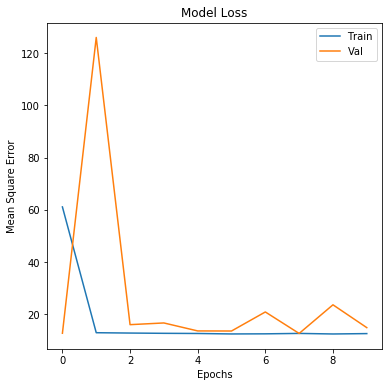

In [23]:
# batch 20, epoch 10
plt.figure(figsize=(6,6))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper right')
plt.show()